In [323]:
import pandas as pd
pd.set_option('display.max_columns', 500)

df = pd.read_csv('cleaned_train.csv')



In [324]:
df.head()

,weight,response,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pickup_datetime,pickup_week,pickup_wday
0,1,1.75,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,2015-05-11 18:00:00,20,Monday
1,1,2.95,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,2015-05-06 18:00:00,19,Wednesday
2,1,2.46,1016,Manhattan,MN25,Manhattan,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,2015-05-11 07:00:00,20,Monday
3,1,1.66,550,Manhattan,MN99,Manhattan,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,2015-05-13 11:00:00,20,Wednesday
4,1,1.75,501,Manhattan,MN20,Manhattan,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,2015-05-07 20:00:00,19,Thursday


In [325]:
df.drop(['weight'], axis=1, inplace=True)
df['response%'] = df['response'] / df['fare_amount']

## convert hoods and nta to clusters

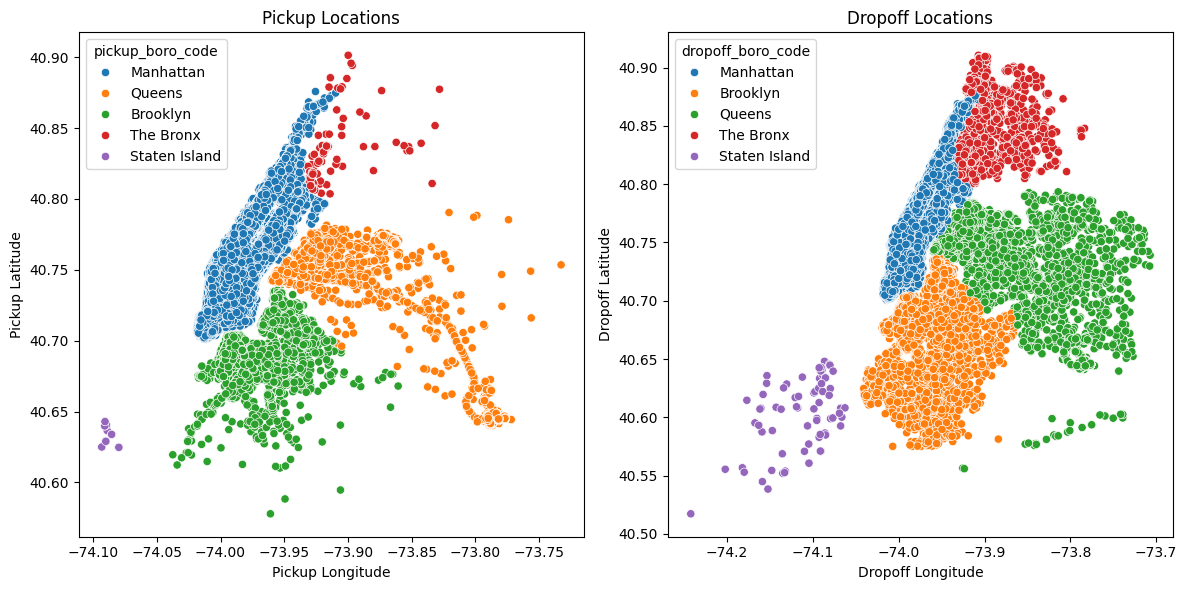

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for pickup locations
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='pickup_boro_code', data=df, ax=axes[0])
axes[0].set_xlabel('Pickup Longitude')
axes[0].set_ylabel('Pickup Latitude')
axes[0].set_title('Pickup Locations')

# Scatter plot for dropoff locations
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_boro_code', data=df, ax=axes[1])
axes[1].set_xlabel('Dropoff Longitude')
axes[1].set_ylabel('Dropoff Latitude')
axes[1].set_title('Dropoff Locations')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def create_code_clusters(df, n):
    pickup = df[['pickup_latitude', 'pickup_longitude']]
    dropoff = df[['dropoff_latitude', 'dropoff_longitude']]

    pickup_scaler = StandardScaler()
    dropoff_scaler = StandardScaler()
    
    pickup_scaled = pickup_scaler.fit_transform(pickup)
    dropoff_scaled = dropoff_scaler.fit_transform(dropoff)

    pickup_kmeans = KMeans(n_clusters=n, random_state=42)
    dropoff_kmeans = KMeans(n_clusters=n, random_state=45)

    pickup_kmeans.fit(pickup_scaled)
    dropoff_kmeans.fit(dropoff_scaled)

    df['pickup_codes'] = pickup_kmeans.labels_
    df['dropoff_codes'] = dropoff_kmeans.labels_


    return df


In [328]:
df = create_code_clusters(df, 25)

/Users/kubamalachowski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kubamalachowski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


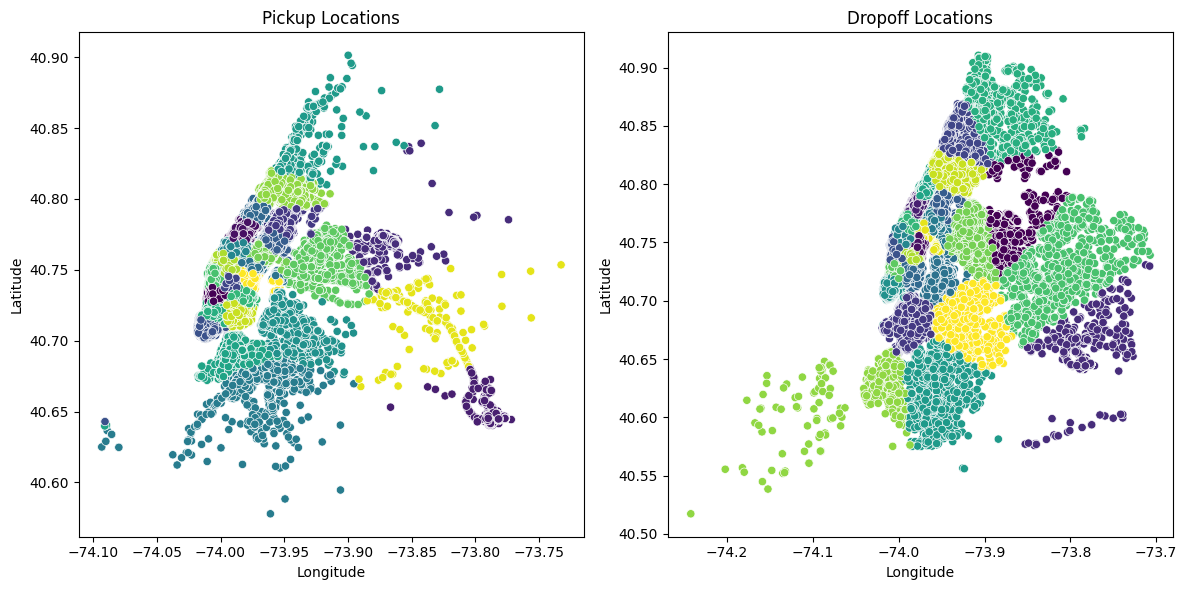

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for pickup locations
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='pickup_codes', palette='viridis', data=df, ax=axes[0])
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Pickup Locations')
axes[0].legend().remove()  # Remove legend to avoid redundancy

# Scatter plot for dropoff locations
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_codes', palette='viridis', data=df, ax=axes[1])
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Dropoff Locations')
axes[1].legend().remove()  # Remove legend to avoid redundancy

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


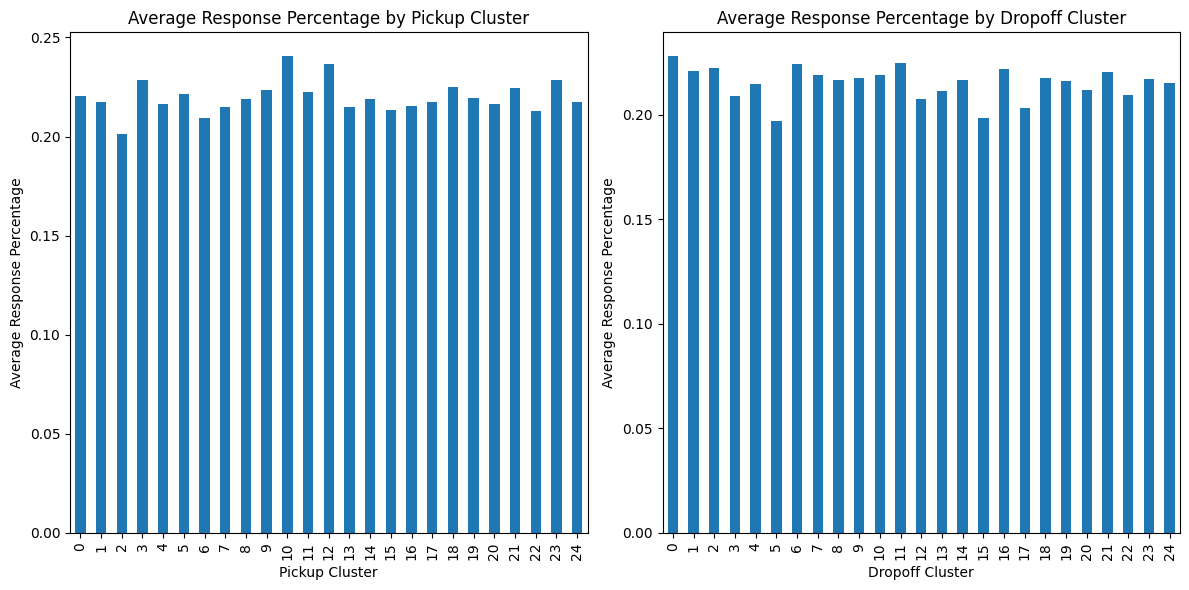

In [330]:
# average response percentage by pickup cluster and dropoff cluster side by side

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Average response percentage by pickup cluster
pickup_response = df.groupby('pickup_codes')['response%'].mean()
pickup_response.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Pickup Cluster')
axes[0].set_ylabel('Average Response Percentage')
axes[0].set_title('Average Response Percentage by Pickup Cluster')

# Average response percentage by dropoff cluster
dropoff_response = df.groupby('dropoff_codes')['response%'].mean()
dropoff_response.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Dropoff Cluster')
axes[1].set_ylabel('Average Response Percentage')
axes[1].set_title('Average Response Percentage by Dropoff Cluster')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


In [331]:
df.columns

Index(['response', 'length_time', 'pickup_boro_code', 'pickup_nta_code',
       'dropoff_boro_code', 'dropoff_nta_code', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id',
       'passenger_count', 'trip_distance', 'fare_amount', 'pickup_datetime',
       'pickup_week', 'pickup_wday', 'response%', 'pickup_codes',
       'dropoff_codes'],
      dtype='object')

In [332]:
df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_boro_code', 'pickup_nta_code',
       'dropoff_boro_code', 'dropoff_nta_code'], axis=1, inplace=True)

In [333]:
df.head()

,response,length_time,vendor_id,passenger_count,trip_distance,fare_amount,pickup_datetime,pickup_week,pickup_wday,response%,pickup_codes,dropoff_codes
0,1.75,520,1,1,0.90,7.0,2015-05-11 18:00:00,20,Monday,0.250000,11,23
1,2.95,824,1,1,1.40,10.0,2015-05-06 18:00:00,19,Wednesday,0.295000,16,18
2,2.46,1016,2,1,1.14,11.5,2015-05-11 07:00:00,20,Monday,0.213913,6,12
3,1.66,550,2,1,1.28,7.5,2015-05-13 11:00:00,20,Wednesday,0.221333,19,1
4,1.75,501,1,1,1.40,7.5,2015-05-07 20:00:00,19,Thursday,0.233333,24,8


## create dummies for days of week and hours

In [334]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create dummy variables for day of week
day_of_week_dummies = pd.get_dummies(df['pickup_datetime'].dt.day_name(), prefix='day')

# Create dummy variables for hour of day
hour_dummies = pd.get_dummies(df['pickup_datetime'].dt.hour, prefix='hour')

#code dummies
pickup_dummies = pd.get_dummies(df['pickup_codes'], prefix='pickup')
dropoff_dummies = pd.get_dummies(df['dropoff_codes'], prefix='dropoff')


# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, day_of_week_dummies, hour_dummies, pickup_dummies, dropoff_dummies], axis=1)

#change type
df[day_of_week_dummies.columns] = df[day_of_week_dummies.columns].astype(int)
df[hour_dummies.columns] = df[hour_dummies.columns].astype(int)
df[pickup_dummies.columns] = df[pickup_dummies.columns].astype(int)
df[dropoff_dummies.columns] = df[dropoff_dummies.columns].astype(int)

df.drop(['pickup_datetime', 'pickup_wday', 'pickup_codes', 'dropoff_codes'], axis=1, inplace=True)

In [335]:
df

,response,length_time,vendor_id,passenger_count,trip_distance,fare_amount,pickup_week,response%,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,pickup_0,pickup_1,pickup_2,pickup_3,pickup_4,pickup_5,pickup_6,pickup_7,pickup_8,pickup_9,pickup_10,pickup_11,pickup_12,pickup_13,pickup_14,pickup_15,pickup_16,pickup_17,pickup_18,pickup_19,pickup_20,pickup_21,pickup_22,pickup_23,pickup_24,dropoff_0,dropoff_1,dropoff_2,dropoff_3,dropoff_4,dropoff_5,dropoff_6,dropoff_7,dropoff_8,dropoff_9,dropoff_10,dropoff_11,dropoff_12,dropoff_13,dropoff_14,dropoff_15,dropoff_16,dropoff_17,dropoff_18,dropoff_19,dropoff_20,dropoff_21,dropoff_22,dropoff_23,dropoff_24
0,1.75,520,1,1,0.90,7.0,20,0.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.95,824,1,1,1.40,10.0,19,0.295000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.46,1016,2,1,1.14,11.5,20,0.213913,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.66,550,2,1,1.28,7.5,20,0.221333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.75,501,1,1,1.40,7.5,19,0.233333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341001,2.00,740,2,1,5.84,18.5,21,0.108108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341002,1.00,193,2,6,0.70,4.5,21,0.222222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341003,2.35,764,1,1,1.70,10.0,20,0.235000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341004,2.65,955,1,1,2.20,12.0,21,0.220833,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## outlier detection

In [336]:

df = df.loc[df["length_time"]<df["length_time"].quantile(0.99)]
df = df.loc[df["length_time"]>df["length_time"].quantile(0.01)]
df = df.loc[df["trip_distance"]<df["trip_distance"].quantile(0.99)]
df = df.loc[df["trip_distance"]>df["trip_distance"].quantile(0.01)]
df = df.loc[df["fare_amount"]<df["fare_amount"].quantile(0.99)]
df = df.loc[df["fare_amount"]>df["fare_amount"].quantile(0.01)]
#df = df.loc[df["response"]<df["response"].quantile(0.99)]
#df = df.loc[df["response"]>df["response"].quantile(0.01)]

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["trip_distance", "length_time"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.coef_#
#model.intercept_

df['predicted_fare'] = df['trip_distance']*model.coef_[0] + df['length_time']*model.coef_[1] + model.intercept_
df['pred_diff'] = df['predicted_fare'] - df['fare_amount']

In [338]:
df = df.loc[df['pred_diff']<df['pred_diff'].quantile(0.995)]
df = df.loc[df['pred_diff']>df['pred_diff'].quantile(0.005)]
df = df.loc[df['fare_amount']!=52]
df['pred_diff'].describe()

count    315066.000000
mean         -0.001759
std           0.498772
min          -2.015537
25%          -0.247112
50%           0.015042
75%           0.275555
max           1.953312
Name: pred_diff, dtype: float64

In [339]:
df

,response,length_time,vendor_id,passenger_count,trip_distance,fare_amount,pickup_week,response%,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,pickup_0,pickup_1,pickup_2,pickup_3,pickup_4,pickup_5,pickup_6,pickup_7,pickup_8,pickup_9,pickup_10,pickup_11,pickup_12,pickup_13,pickup_14,pickup_15,pickup_16,pickup_17,pickup_18,pickup_19,pickup_20,pickup_21,pickup_22,pickup_23,pickup_24,dropoff_0,dropoff_1,dropoff_2,dropoff_3,dropoff_4,dropoff_5,dropoff_6,dropoff_7,dropoff_8,dropoff_9,dropoff_10,dropoff_11,dropoff_12,dropoff_13,dropoff_14,dropoff_15,dropoff_16,dropoff_17,dropoff_18,dropoff_19,dropoff_20,dropoff_21,dropoff_22,dropoff_23,dropoff_24,predicted_fare,pred_diff
0,1.75,520,1,1,0.90,7.0,20,0.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6.931241,-0.068759
1,2.95,824,1,1,1.40,10.0,19,0.295000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9.756570,-0.243430
2,2.46,1016,2,1,1.14,11.5,20,0.213913,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10.486269,-1.013731
3,1.66,550,2,1,1.28,7.5,20,0.221333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.815748,0.315748
4,1.75,501,1,1,1.40,7.5,19,0.233333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.727790,0.227790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341001,2.00,740,2,1,5.84,18.5,21,0.108108,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.362058,-1.137942
341002,1.00,193,2,6,0.70,4.5,21,0.222222,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.510982,0.010982
341003,2.35,764,1,1,1.70,10.0,20,0.235000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.929240,-0.070760
341004,2.65,955,1,1,2.20,12.0,21,0.220833,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.044810,0.044810


25k deleted observations

In [340]:
df.drop(['predicted_fare', 'pred_diff'], axis=1, inplace=True)

# modelling

In [341]:
df.columns

Index(['response', 'length_time', 'vendor_id', 'passenger_count',
       'trip_distance', 'fare_amount', 'pickup_week', 'response%',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'pickup_0', 'pickup_1', 'pickup_2',
       'pickup_3', 'pickup_4', 'pickup_5', 'pickup_6', 'pickup_7', 'pickup_8',
       'pickup_9', 'pickup_10', 'pickup_11', 'pickup_12', 'pickup_13',
       'pickup_14', 'pickup_15', 'pickup_16', 'pickup_17', 'pickup_18',
       'pickup_19', 'pickup_20', 'pickup_21', 'pickup_22', 'pickup_23',
       'pickup_24', 'dropoff_0', 'dropoff_1', 'dropoff_2', 'dropoff_3',
       'dropoff_4', 'dropoff_5', 'dropoff_6', 'dropoff_7', 'dro

In [342]:
y = df.pop('response')
y_per = df.pop('response%')
X = df.copy()


In [343]:
X

,length_time,vendor_id,passenger_count,trip_distance,fare_amount,pickup_week,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,pickup_0,pickup_1,pickup_2,pickup_3,pickup_4,pickup_5,pickup_6,pickup_7,pickup_8,pickup_9,pickup_10,pickup_11,pickup_12,pickup_13,pickup_14,pickup_15,pickup_16,pickup_17,pickup_18,pickup_19,pickup_20,pickup_21,pickup_22,pickup_23,pickup_24,dropoff_0,dropoff_1,dropoff_2,dropoff_3,dropoff_4,dropoff_5,dropoff_6,dropoff_7,dropoff_8,dropoff_9,dropoff_10,dropoff_11,dropoff_12,dropoff_13,dropoff_14,dropoff_15,dropoff_16,dropoff_17,dropoff_18,dropoff_19,dropoff_20,dropoff_21,dropoff_22,dropoff_23,dropoff_24
0,520,1,1,0.90,7.0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,824,1,1,1.40,10.0,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1016,2,1,1.14,11.5,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,550,2,1,1.28,7.5,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,501,1,1,1.40,7.5,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341001,740,2,1,5.84,18.5,21,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341002,193,2,6,0.70,4.5,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341003,764,1,1,1.70,10.0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341004,955,1,1,2.20,12.0,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [344]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [345]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV()
model = XGBRegressor(random_state=0)
model2 = LGBMRegressor(random_state=0)
params = {
    "n_estimators": [300, 400],
    'learning_rate': [0.05],
    "max_depth": [4, 6],
    #'min_child_samples': [20],
    #'num_leaves': [40],
    #'reg_alpha': [0.5,100, 1000]
    
}


search_cv = GridSearchCV(estimator= model, param_grid=params, verbose=3, 
                         scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
search_cv.fit(X,y)
print(search_cv.best_params_, search_cv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=-0.558, test=-0.558) total time=   1.8s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=-0.558, test=-0.559) total time=   1.8s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=-0.556, test=-0.564) total time=   1.8s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=-0.557, test=-0.562) total time=   1.8s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=(train=-0.556, test=-0.562) total time=   1.8s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=(train=-0.556, test=-0.558) total time=   2.2s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=(train=-0.556, test=-0.559) total time=   2.2s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=(train=-0.555, test=-0.563) total time=   2

In [346]:
from sklearn.metrics import mean_absolute_error
model = XGBRegressor(n_estimators=400, learning_rate=0.05, max_depth=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

model.fit(X_train, y_train)
tip_pred = model.predict(X_test)
mean_absolute_error(y_test, tip_pred)

0.560773273538899

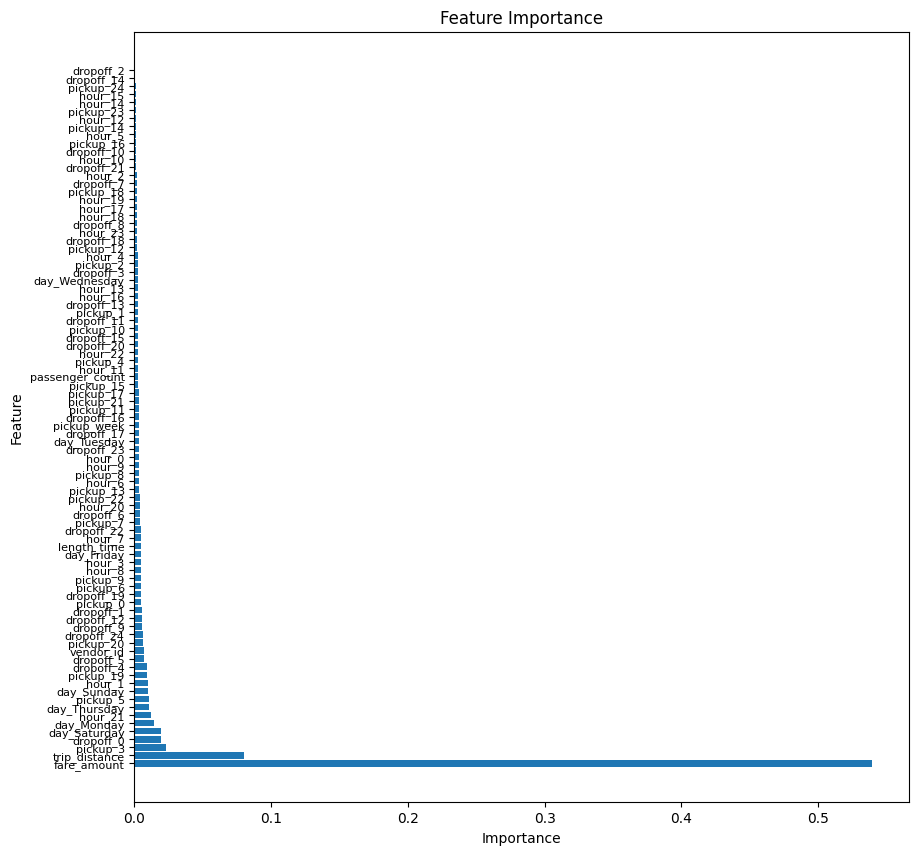

In [347]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, X):
    # Get feature importances from the model
    feature_importance = model.feature_importances_

    # Create a DataFrame using a dictionary of feature importance
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importance
    })

    # Sort the DataFrame in descending order of feature importance
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 10))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])

    # Customize labels
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

    # Adjust font size of labels
    plt.yticks(fontsize=8)

    plt.show()

# Example usage:
# Assuming 'model' is your trained model and 'X' is your feature matrix
plot_feature_importance(model, X)


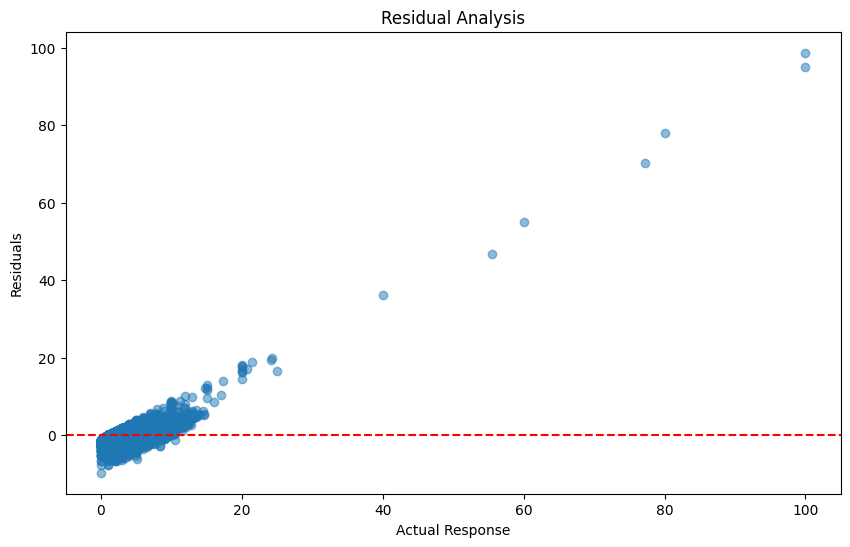

In [348]:
# plot residuals

def plot_residuals(model, X, y):
    # Predict the response
    y_pred = model.predict(X)

    # Compute the residuals
    residuals = y - y_pred

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y, residuals, alpha=0.5)

    # Add a horizontal line at y = 0
    plt.axhline(0, color='red', ls='--')

    # Customize labels
    plt.xlabel('Actual Response')
    plt.ylabel('Residuals')
    plt.title('Residual Analysis')

    plt.show()

# Example usage:
# Assuming 'model' is your trained model, and 'X' and 'y' are your feature matrix and response
plot_residuals(model, X_test, y_test)

In [349]:
from sklearn.metrics import mean_absolute_error

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=0)

#split

X_train, X_test, y_train, y_test = train_test_split(X, y_per, test_size=0.2, random_state=44)

model.fit(X_train, y_train)

def score_tip_prediction(model, X_test, y_test):
    # Predict the percentage of tip for the test data
    tip_percentage_pred = model.predict(X_test)
    
    # Calculate the actual tip amount by multiplying with total fare
    fare_amount = X_test['fare_amount']  # Assuming 'fare_amount' is a column in X_test
    tip_amount_predicted = tip_percentage_pred * fare_amount
    tim_amount_actual = y_test * fare_amount
    
    # Calculate mean absolute error between predicted and actual tip amounts
    mae = mean_absolute_error(tim_amount_actual, tip_amount_predicted)
    
    return mae

# Example usage:
# Assuming 'model' is your trained model, and 'X_test' and 'y_test' are your test data
mae = score_tip_prediction(model, X_test, y_test)
print("Mean Absolute Error (MAE) for tip prediction:", mae)


Mean Absolute Error (MAE) for tip prediction: 0.5604517121358533


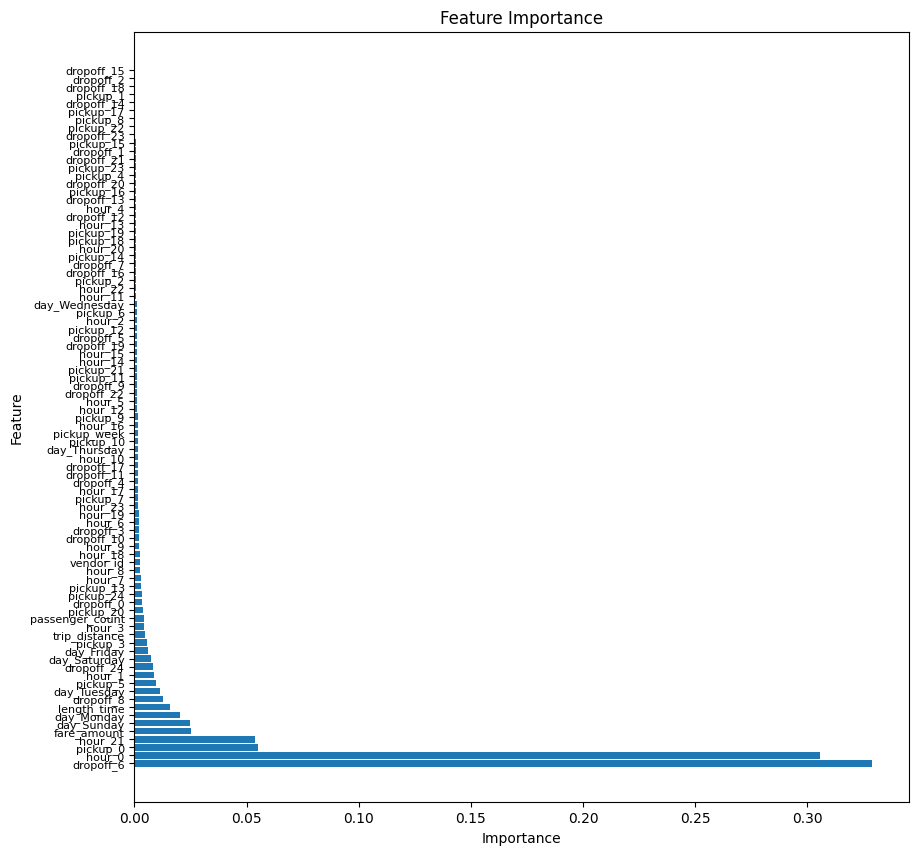

In [350]:
plot_feature_importance(model, X)


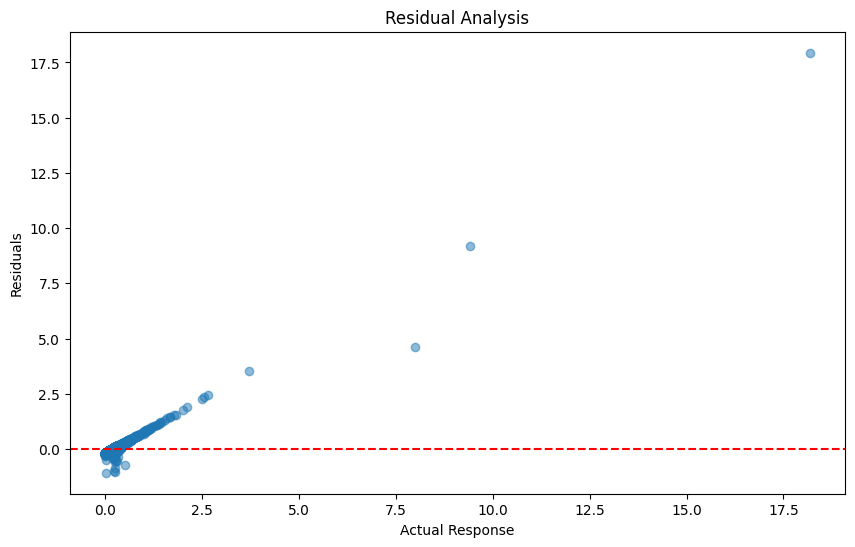

In [351]:
# plot residuals

def plot_residuals(model, X, y):
    # Predict the response
    y_pred = model.predict(X)

    # Compute the residuals
    residuals = y - y_pred

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y, residuals, alpha=0.5)

    # Add a horizontal line at y = 0
    plt.axhline(0, color='red', ls='--')

    # Customize labels
    plt.xlabel('Actual Response')
    plt.ylabel('Residuals')
    plt.title('Residual Analysis')

    plt.show()

# Example usage:
# Assuming 'model' is your trained model, and 'X' and 'y' are your feature matrix and response
plot_residuals(model, X_test, y_test)